# PEiAR Laboratorium 10
## Zad.1 (Ggplot – c.d.)
Zbudujemy bazę dla wykresu ggplot z zakresem argumentów [-8, 8] i kolorami odpowiadającymi
zadanym parametrom rozkładu normalnego w następujący sposób:
`base = ggplot(data.frame(x = c(-8, 8)), aes(x))`
Komenda `base = base + labs(colour = ‘Treść nagłówka legendy’)`
pozwoli nadać legendzie pożądany nagłówek.
Na bazie zdefiniowanego konstruktora generujemy wykres funkcji gęstości rozkładu normalnego
standardowego z kolorem nadanym domyślnie (na razie) przez paczkę ggplot2:
`plot1 =
base + stat_function( fun = dnorm, geom = ‘line’, n = 100, aes(colour = ‘mean = 0, sd = 1’)`,
// treść przy pierwszym kolorze // size = 0.8 )

Za co odpowiada parametr size?

Na istniejący wykres naniesiemy wykres funkcji gęstości rozkładu normalnego z parametrami
średnia = 1, odchylenie = 2 i znacznie grubszą linią:
`plot2 = plot1 + stat_function( fun = dnorm, args = list(mean = 1, sd = 2)`, // wartości parametrów
rozkładu // `geom = ‘line’, n =100, aes(colour = ‘mean = 1, sd = 2’)`, // treść przy drugim
kolorze // size = 1.5 )

Następnie, naniesiemy wykres funkcji gęstości rozkładu normalnego ze średnią = 3 oraz
odchyleniem standardowym = 0.6 (cieńszą linią, np. 0.5):

`plot3 = plot2 + stat_function( fun = dnorm, args = list(mean = 3, sd = 0.6)`, // precyzujemy parametry...
// `geom = ‘line’, aes(colour = ‘mean = 3, sd = 0.6’)`, // objaśnienie dla 3 koloru // size = 0.5 )
Dodajmy tytuł ‘Gęstości rozkładów normalnych’
`plot4 = plot3 + ggtitle(‘Gęstości rozkładów normalnych’)`
Zmieńmy kolory kolejnych wykresów np. na: czarny, niebieski i pomarańczowy:
`plot5 = plot4 + scale_colour_manual( values = c(‘black’, ‘blue’, ‘orange’) )`
Co stanie się z legendą jeżeli dodamy do uzyskanego wykresu kod
`plot6 = plot5 + theme( legend.position = c(0.2, 0.75), legend.background = element_rect(fill = ‘grey’))`
Poeksperymentuj z wartościami parametru legend.position. Dobierz je tak, aby legenda widoczna
była mniej więcej w prawym górnym rogu obszaru ograniczonego osiami układu.


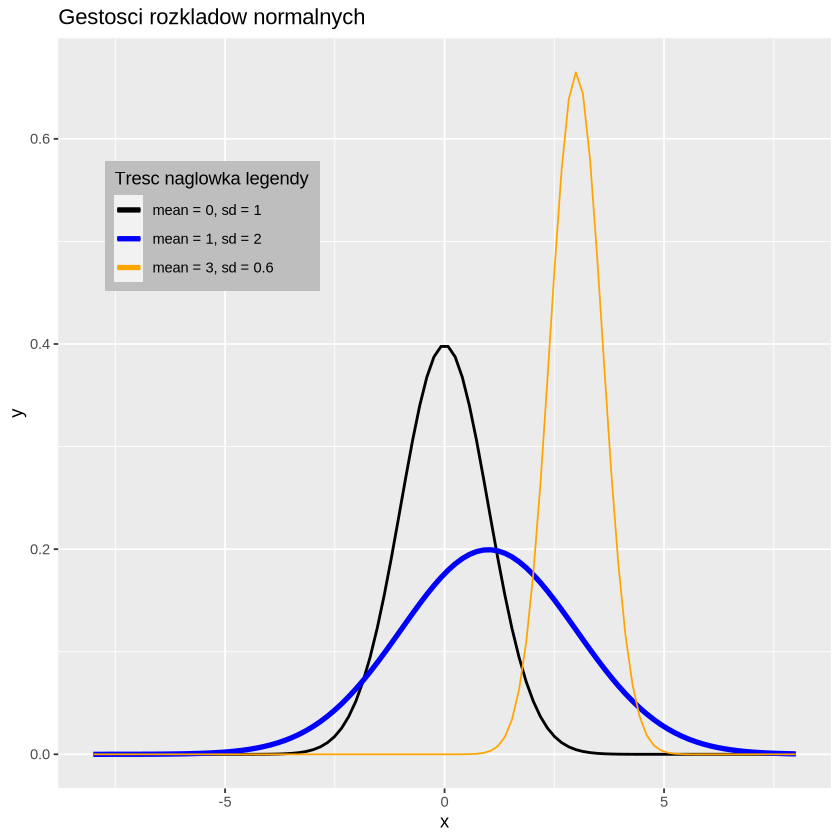

In [29]:
library(ggplot2)
base_ <- ggplot(data.frame(x = c(-8, 8)), aes(x))
base_ <- base_ + labs(colour = "Tresc naglowka legendy")
plot_1 <- base_ + stat_function(fun = dnorm,
  geom = 'line', n = 100, aes(colour = 'mean = 0, sd = 1'), size = 0.8)
plot_2 <- plot_1 + stat_function(fun = dnorm,
  args = list(mean = 1, sd = 2), geom = 'line', n = 100,
  aes(colour = 'mean = 1, sd = 2'), size = 1.5)
plot_3 <- plot_2 + stat_function(fun = dnorm, args = list(mean = 3, sd = 0.6), geom = 'line', n = 100,
  aes(colour = 'mean = 3, sd = 0.6'), size = 0.5)
plot_4 <- plot_3 + ggtitle('Gestosci rozkladow normalnych')
plot_5 <- plot_4 + scale_colour_manual(values = c('black', 'blue', 'orange'))
plot_6 <- plot_5 + theme(legend.position = c(0.2, 0.75),
  legend.background = element_rect(fill = 'grey'))
plot_6

## Zad.2 (Wykresy piramidowe)
Wygeneruj ramkę frame_ z kolumnami:
`‘Miasto’ o wartościach: ‘Miasto1’,‘Miasto2’,‘Miasto3’,‘Miasto4’,‘Miasto5’,‘Miasto6’`;
‘Kobiety’ o wartościach: 350, 484, 196, 320, 560, 731 oraz
‘Mężczyźni’ o wartościach: 370, 492, 174, 350, 530, 710.
Ramkę frame_ poszerz o kolumnę ‘Razem’ - użyj w tym celu funkcji apply(...).

In [36]:
frame_ <- data.frame(
  Miasto = c('Miasto1', 'Miasto2','Miasto3', 'Miasto4', 'Miasto5', 'Miasto6'),
  Kobiety = c(350, 484, 196, 320, 560, 731),
  Mezczyzni = c(370, 492, 174, 350, 530, 710)
)
frame_$Razem <- apply(frame_[, c('Kobiety', 'Mezczyzni')], 1, sum)
frame_

Miasto,Kobiety,Mezczyzni,Razem
<chr>,<dbl>,<dbl>,<dbl>
Miasto1,350,370,720
Miasto2,484,492,976
Miasto3,196,174,370
Miasto4,320,350,670
Miasto5,560,530,1090
Miasto6,731,710,1441


Zainstaluj paczkę ‘plotrix’ i załaduj ją. Zechcemy narysować tzw. wykres piramidowy służący
najczęściej do prezentacji danych demograficznych.
Załącz ramkę do bieżącej sesji w celu łatwiejszego dostępu do jej kolumn.
Wpisz polecenie:
`pyramid.plot(Kobiety, Mężczyźni, labels = Miasto, gap = 100)`
Ukazały się domyślne nagłówki, które trzeba teraz właściwie ustawić. W tym celu dodaj w definicji
wykresu piramidowego argument: top.labels = c(‘Kobiety’, ‘Miasto’, ‘Mężczyźni’).
Czym steruje atrybut gap?
Dodaj kolejny argument: main = ‘To jest wykres piramidowy’ aby nadać wykresowi tytuł.
Aby oddzielić od siebie poszczególne paski na wykresie, użyj kolejnego argumentu w funkcji
pyramid.plot: space = 0.5 // na przykład // → poeksperymentuj.
Aby ustawić żądaną podziałkę na osi x możemy użyć kolejnych argumentów:
`laxlab = c(0, 400, 800) // na lewo raxlab = c(0, 400, 800)` // na prawo //
Dodatkowo, jeśli chcemy, by przy paskach widoczne były ich precyzyjne wartości liczbowe,
możemy dodać argument: show.values = TRUE.


800 800 


[1] 5.1 4.1 4.1 2.1

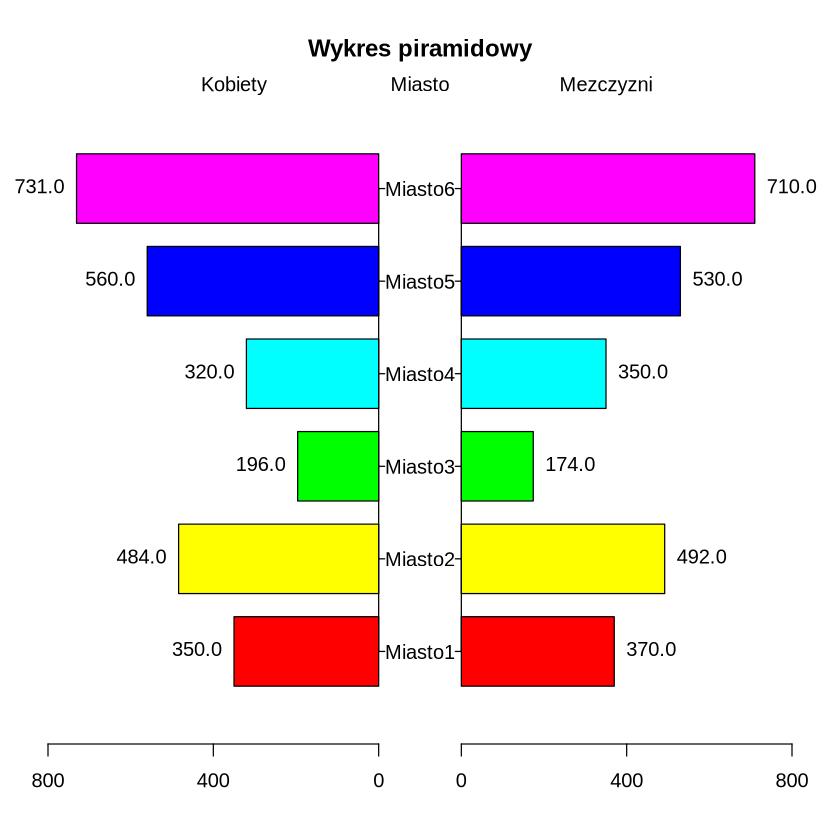

In [53]:
library(plotrix)
attach(frame_)
pyramid.plot(Kobiety, Mezczyzni, labels = Miasto, gap = 100,
  main = 'Wykres piramidowy', space = 0.25,
  laxlab = c(0, 400, 800), raxlab = c(0, 400, 800), show.values = T,
  top.labels = c('Kobiety','Miasto' ,'Mezczyzni'),
  unit = ''
)
detach(frame_)

## Zad.3 (Nadal wykresy...)
W wykresie piramidowym z Zad. 2, zwiększ odstęp pomiędzy skrzydłami wykresu (parametr gap),
zmień widoczną u dołu jednostkę miary (parametr unit), zwiększ czcionkę etykiet (parametr
labelcex) oraz zmień dokładność, z jaką widoczne są dane liczbowe przy paskach (parametr ndig).


## Zad.4
Wygeneruj ramkę frame_ z kolumnami Planeta, Masa i Średnica o wartościach odpowiednio:
Neptun, Uran, Saturn, Jowisz, Mars, Ziemia, Wenus, Merkury;
17.15, 14.54, 95.16, 317.80, 0.11, 1.00, 0.81, 0.06 oraz
3.88, 4.00, 9.45, 11.20, 0.53, 1.00, 0.94, 0.38 (są to dane relatywne w odniesieniu do Ziemi).
Wygeneruj wykres piramidowy zestawiający masę i średnicę dla poszczególnych planet
`attach(frame_)`
`pyramid.plot(..., ..., labels = ...)`
Ustaw odpowiednie nagłówki oraz podziałkę na lewej osi: 0, 100, ..., 400 natomiast na prawej osi:
0, 10, ... 50. Zadbaj o detale wykresu.
Zad.5 (Błądzenie losowe na płaszczyźnie...)
Błądzenie losowe cząstki po płaszczyźnie jest pewnym stochastycznym (czyli losowym) ruchem
partykuły startującej z punktu (0, 0) i idącej – w jednym kroku – jednostkę w lewo lub prawo (z
jednakowym pr-stwem) oraz niezależnie od tego jednostkę w górę lub dół (również z jednakowym
pr-stwem).
Zatem z pr-stwem 1⁄4 po jednym kroku, cząsteczka może się znaleźć w jednym z czterech punktów:
(1, 1), (-1, 1), (-1, -1) lub (1, -1). Zilustrujemy to.
Chcemy najpierw aby wykres był w kwadratowej ramce (a nie prostokątnej zajmującej całą
szerokość widoku) dlatego
`par(pty = ‘s’)` // plot type ustawiony na square (zamiast na ‘m’, czyli max)//
Następnie używamy zwykłego polecenia plot(...), które jako swoje dwa pierwsze (podstawowe)
argumenty przyjmuje: wektor pierwszych współrzędnych i wektor drugich współrzędnych punktów
które chcemy narysować.
Ustaw:
* typ wykresu na punktowy (atrybut type)
* zakres obu osi na [-2, 2]
* etykiety osi: ‘x coordinate’ oraz ‘y coordinate’
* wielkość wartości liczbowych podpisujących obie osie na 0.75 (atrybut cex.axis)
* wielkość punktów (kropek) wykresu na 0.9 (atrybut cex)
* kształt punktów (kropek) wykresu na dowolną wartość całkowitą między -1 a 25 (atrybut pch)f.
Wypoziomuj ponadto czcionkę podpisującą oś pionową.
Teraz, chcemy dodać strzałki wskazujące z początku układu współrzędnych, do jakiego punktu
kolejno możemy dotrzeć. Zacznijmy od punku (1, 1).
Ustaw:
* grot strzałki sięgający punktu (0.9, 0.9)
* długość grota na wartość 0.15
* kąt prosty ramionom strzałki

Zilustruj strzałki wskazujące na pozostałe trzy punkty. Dalej, umieść napisy informujące, z jakim
pr-stwem docieramy do każdego ze wskazanych punktów (np. ‘prob = 0.25’).
Na końcu, nanieś na wykres przerywane linie w miejscu osi pionowej i poziomej używając w tym
celu polecenia abline(...) z atrybutem lty ustawionym na wartość 2.